In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [ ]:
num_tokens = 20
conv1 = nn.Conv2d(in_channels=1, out_channels=num_tokens, kernel_size=3, padding=1)
conv2 = nn.Conv2d(in_channels=num_tokens, out_channels=num_tokens, kernel_size=3, padding=1)
conv3 = nn.Conv2d(in_channels=num_tokens, out_channels=1, kernel_size=1)

In [ ]:
data = torch.rand(1,1,256,256)
print(data)
print(data.shape)

tensor([[[[0.7397, 0.0387, 0.4422,  ..., 0.2137, 0.5990, 0.4511],
          [0.4375, 0.1024, 0.7487,  ..., 0.7116, 0.4475, 0.3613],
          [0.1965, 0.3574, 0.0925,  ..., 0.0181, 0.5812, 0.9949],
          ...,
          [0.6569, 0.7467, 0.6159,  ..., 0.4868, 0.5137, 0.5295],
          [0.9461, 0.4703, 0.6877,  ..., 0.1296, 0.6442, 0.2186],
          [0.4256, 0.9781, 0.9120,  ..., 0.4431, 0.7597, 0.6242]]]])
torch.Size([1, 1, 256, 256])


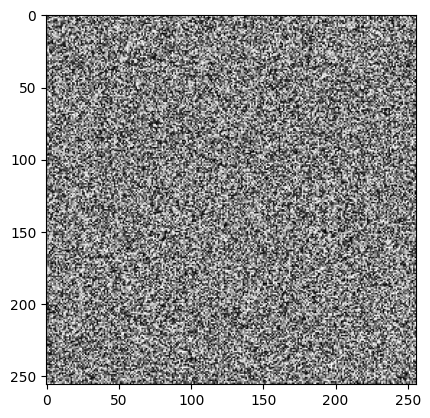

In [ ]:
plt.imshow(data[0,0,:,:], cmap='gray')
plt.show()

In [ ]:
res1 = F.tanh(conv1(data))
res2 = F.gelu(conv2(res1))
res3 = F.relu(conv3(res2))

[[[[-0.07686563  0.17989609  0.07139438 ...  0.02706794 -0.1584137
    -0.09067003]
   [ 0.16576387 -0.23700915 -0.10939561 ... -0.21021827  0.19969775
    -0.19099927]
   [ 0.03984798 -0.07822704  0.01445289 ... -0.10852475 -0.2510585
    -0.06935018]
   ...
   [-0.0810716  -0.23517773 -0.18186027 ...  0.07241753 -0.11531768
    -0.13295086]
   [ 0.02025302 -0.02828069 -0.33362055 ... -0.06433237 -0.16414176
    -0.12320513]
   [-0.07137402 -0.27870834  0.07243021 ... -0.20628177 -0.0063285
     0.04680051]]

  [[ 0.3136932   0.2744695   0.39694983 ...  0.34976915  0.25460652
     0.10049265]
   [ 0.34244278  0.41657498  0.41538644 ...  0.4424961   0.4047834
     0.12070927]
   [ 0.35456482  0.4428347   0.36647493 ...  0.15916678  0.5112017
     0.21643095]
   ...
   [ 0.44361883  0.31804383  0.22451895 ...  0.2698716   0.37302577
     0.09510687]
   [ 0.5358057   0.37904057  0.2141839  ...  0.29969373  0.38157934
     0.05592205]
   [ 0.45409468  0.54008484  0.29246938 ...  0.4396983

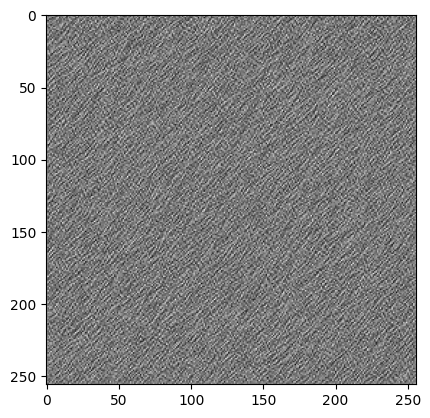

In [ ]:
res1 = res1.detach().numpy()
print(res1)
plt.imshow(res1[0,0,:,:], cmap='gray')
plt.show()

[[[[ 0.03794992  0.13136855  0.11443853 ...  0.14840125  0.10342759
     0.10990369]
   [ 0.04749727  0.23947215  0.11980626 ...  0.1403213   0.16287845
     0.20905985]
   [ 0.02251834  0.14658771  0.187589   ...  0.13129094  0.06613769
     0.19888015]
   ...
   [ 0.04740974  0.17842129  0.04682112 ...  0.07881938  0.04841743
     0.09628312]
   [ 0.07735668  0.20342419  0.10405326 ...  0.17022465  0.07155576
     0.19556782]
   [ 0.00537193  0.07028154  0.05343105 ...  0.11523433  0.00593961
     0.10832021]]

  [[ 0.05909532  0.08122914  0.13707972 ...  0.07812551  0.07890803
     0.06317531]
   [ 0.1930487   0.02038977  0.18877229 ...  0.22306712  0.21462433
     0.07300188]
   [ 0.1488693   0.20798597  0.3417998  ...  0.28233096  0.06366289
     0.08808927]
   ...
   [ 0.18208696  0.19632204  0.26514912 ...  0.24644437  0.10023525
     0.11207186]
   [ 0.26972225  0.27013034  0.42545462 ...  0.23736736  0.28042445
     0.06112149]
   [ 0.14008984  0.10015254  0.1662124  ...  0.06

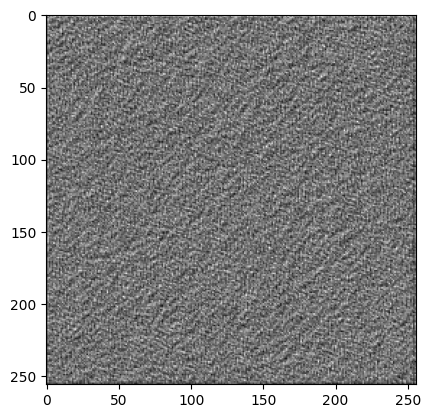

In [ ]:
res2 = res2.detach().numpy()
print(res2)
plt.imshow(res2[0,0,:,:], cmap='gray')
plt.show()

[[[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]]


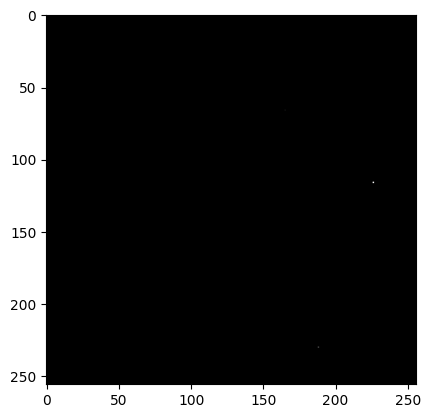

In [ ]:
res3 = res3.detach().numpy()
print(res3)
plt.imshow(res3[0,0,:,:], cmap='gray')
plt.show()

In [ ]:
import scipy
import numpy as np
from scipy import special
from scipy.special import erf

def sig(x):
  s = (1 / (1 + np.exp(-x)))
  return s

def gelu(x):
  cdf = 0.5 * (1.0 + erf(x / np.sqrt(2.0)))
  return x * cdf

def tanh(x):
    a = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
    return a

def relu(x):
  b = np.maximum(x, 0)
  return b

In [ ]:
z = np.arange(-16, 16, 0.0001)
t_z = tanh(z)
g_z = gelu(t_z)
r_z = relu(g_z)

In [ ]:
r_g_z = gelu(z)
r_t_z = tanh(r_g_z)

In [ ]:
# fig, ax = plt.subplots(figsize=(9, 5))
# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')
# ax.plot(z, r_g_z, color="#307EC7", linewidth=3, label="Tanh")
# ax.legend(loc="upper left", frameon=False)
# fig.show()

In [ ]:
# fig, ax = plt.subplots(figsize=(9, 5))
# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')
# ax.plot(z, r_t_z, color="#307EC7", linewidth=3, label="Tanh")
# ax.legend(loc="upper left", frameon=False)
# fig.show()

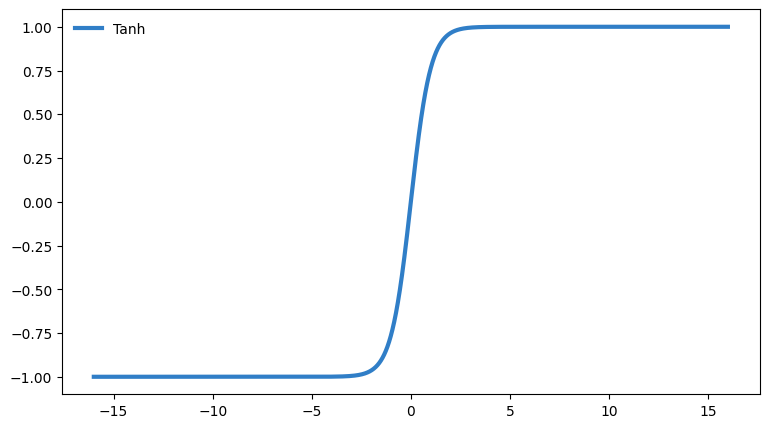

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.plot(z, t_z, color="#307EC7", linewidth=3, label="Tanh")
ax.legend(loc="upper left", frameon=False)
fig.show()

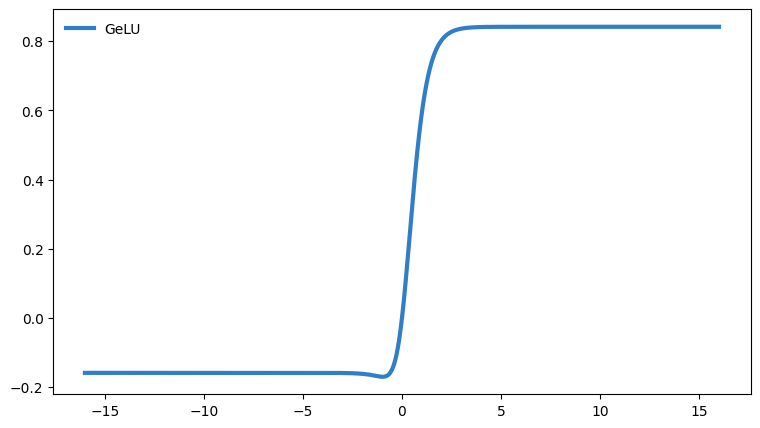

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.plot(z, g_z, color="#307EC7", linewidth=3, label="GeLU")
ax.legend(loc="upper left", frameon=False)
fig.show()

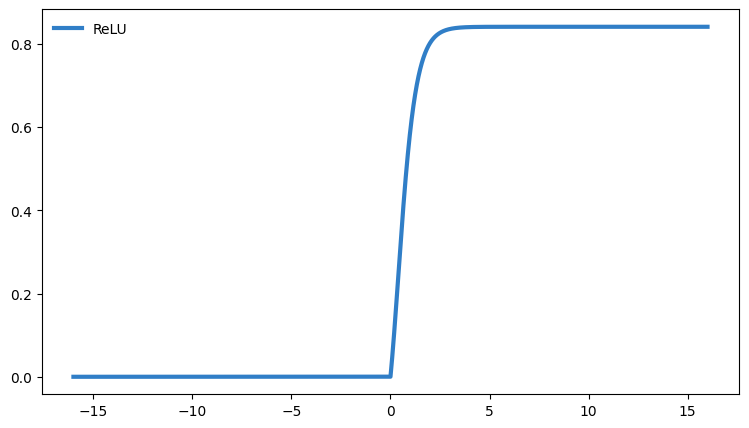

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.plot(z, r_z, color="#307EC7", linewidth=3, label="ReLU")
ax.legend(loc="upper left", frameon=False)
fig.show()

In [ ]:
t_z

array([-1., -1., -1., ...,  1.,  1.,  1.])

In [ ]:
g_z

array([-0.15865525, -0.15865525, -0.15865525, ...,  0.84134475,
        0.84134475,  0.84134475])

In [ ]:
r_z

array([0.        , 0.        , 0.        , ..., 0.84134475, 0.84134475,
       0.84134475])

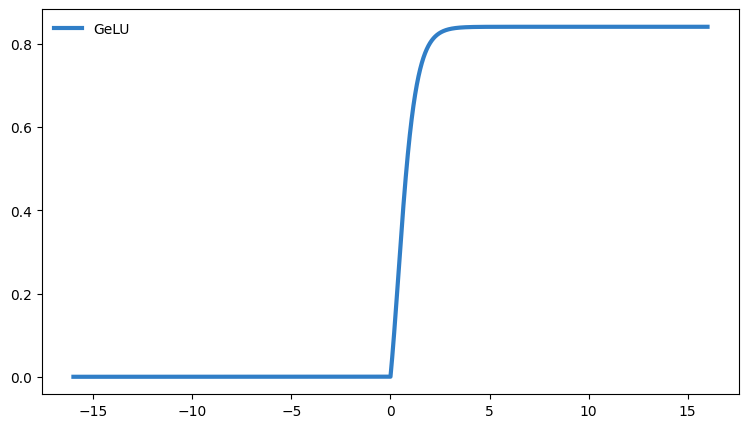

In [ ]:
def new_fn(z):
  t_z = tanh(z)
  g_z = gelu(t_z)
  r_z = relu(g_z)
  return r_z

z = np.arange(-16, 16, 0.0001)
fig, ax = plt.subplots(figsize=(9, 5))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.plot(z, new_fn(z), color="#307EC7", linewidth=3, label="GeLU")
ax.legend(loc="upper left", frameon=False)
fig.show()

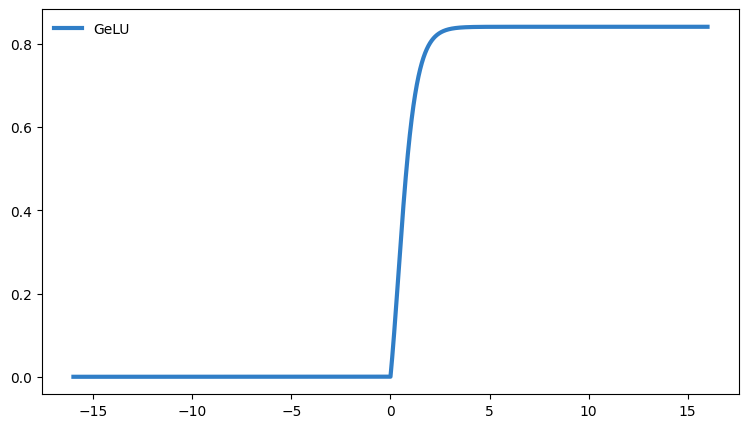

In [ ]:
def new_fn(z):
  t_z = np.maximum(0, gelu(tanh(z)))
  return t_z

z = np.arange(-16, 16, 0.0001)
fig, ax = plt.subplots(figsize=(9, 5))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.plot(z, new_fn(z), color="#307EC7", linewidth=3, label="GeLU")
ax.legend(loc="upper left", frameon=False)
fig.show()
